# <center style="color: red; font-size: 50px;">✪ Gaming Industry History ✪ </center>
    

> <center><img src="https://giffiles.alphacoders.com/217/217181.gif"></center>

# I) Objective
​
><i> It is possible to divide <b>data analysis</b> into two fields: Hypothesis Generation and Hypothesis Confirmation (Also called confirmatory analysis). In this <b>project</b> I will deal only with <b>exploratory analysis</b>, where the objective is to understand how the data is distributed and generate insight for future decision-making, this analysis aims to explore as much as possible the data in a simple, intuitive and informative way. The data used in this project contains information only from <b>1980</b> to <b>2016</b>. Below is a sketch of all the stages made in these notebooks, following a logical and intuitive sequence to facilitate the understanding of the data.</i>
​

# II) Table of content

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Libraries and data import](#0)<br>
2.  [Tải và chuẩn bị dữ liệu](#2)<br>
3.  [Giới thiệu về Folium](#4) <br>
4.  [Bản đồ với các điểm đánh dấu](#6) <br>
5.  [Bản đồ Choropleth](#8) <br>
    </div>


# III) Libaries and data loading<a id="0"></a>

 1) Import packages

In [ ]:
#install packages
!pip install pycountry_convert
!pip install folium
!pip install seaborn
!pip install plotly

2) Import data

In [20]:
#data processing
import numpy as np
import pandas as pd
import json
import math
import datetime

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
%matplotlib inline
#from pandas_profiling import ProfileReport

#machine-learning packages
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

#others
from PIL import Image

In [2]:
#read the full data
vgsales = pd.read_csv("vgsales.csv")
vgsales.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

**Dataset Summary:**

   * <i>Rank</i> - Ranking of overall sales, integer
   
   * <i>Name</i> - The games name

   * <i>Platform</i> - Platform of the games release (i.e. PC,PS4, etc.), object

   * <i>Year</i> - Year of the game's release, float

   * <i>Genre</i> - Genre of the game ,object

   * <i>Publisher</i> - Publisher of the game, object

   * <i>NA_Sales</i> - Sales in North America (in millions), float

   * <i>EU_Sales</i> - Sales in Europe (in millions), float

   * <i>JP_Sales</i> - Sales in Japan (in millions), float

   * <i>Other_Sales</i> - Sales in the rest of the world (in millions), float

   * <i>Global_Sales</i> - Total worldwide sales, float



# IV) DATA PREPARATION

In [3]:
#df_shape
vgsales.shape

(16598, 11)

In [4]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [29]:
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
#replacing null values in publisher columns
vgsales['Publisher'].fillna("Others", inplace=True)
vgsales[vgsales['Publisher'].isnull()]

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

In [6]:
year_mean = vgsales['Year'].mean()
vgsales['Year'].fillna(year_mean, inplace=True)
vgsales[vgsales['Year'].isnull()]

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

# v) Data summary

In [7]:
#unique value in each rows
vgsales.nunique()

Rank            16598
Name            11493
Platform           31
Year               40
Genre              12
Publisher         579
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

11 000 thousand games, across 31 platforms through 578 publishers.

In [21]:
games_by_year = vgsales['Year'].groupby(vgsales['Year']).count()

fig = px.line(games_by_year, x=games_by_year.index, y=games_by_year,
              labels={
                  "index": "Year",
                  "y": "Number of Games"
              }
              )

fig.update_layout(title_text='Number of Games Published Annually', title_x=0.5)

fig.show()

# Sales performance:

{'bodies': [<matplotlib.collections.PolyCollection at 0x1bcf852abe0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1bcf85d3490>,
 'cmins': <matplotlib.collections.LineCollection at 0x1bcf896df70>,
 'cbars': <matplotlib.collections.LineCollection at 0x1bcf8969370>}

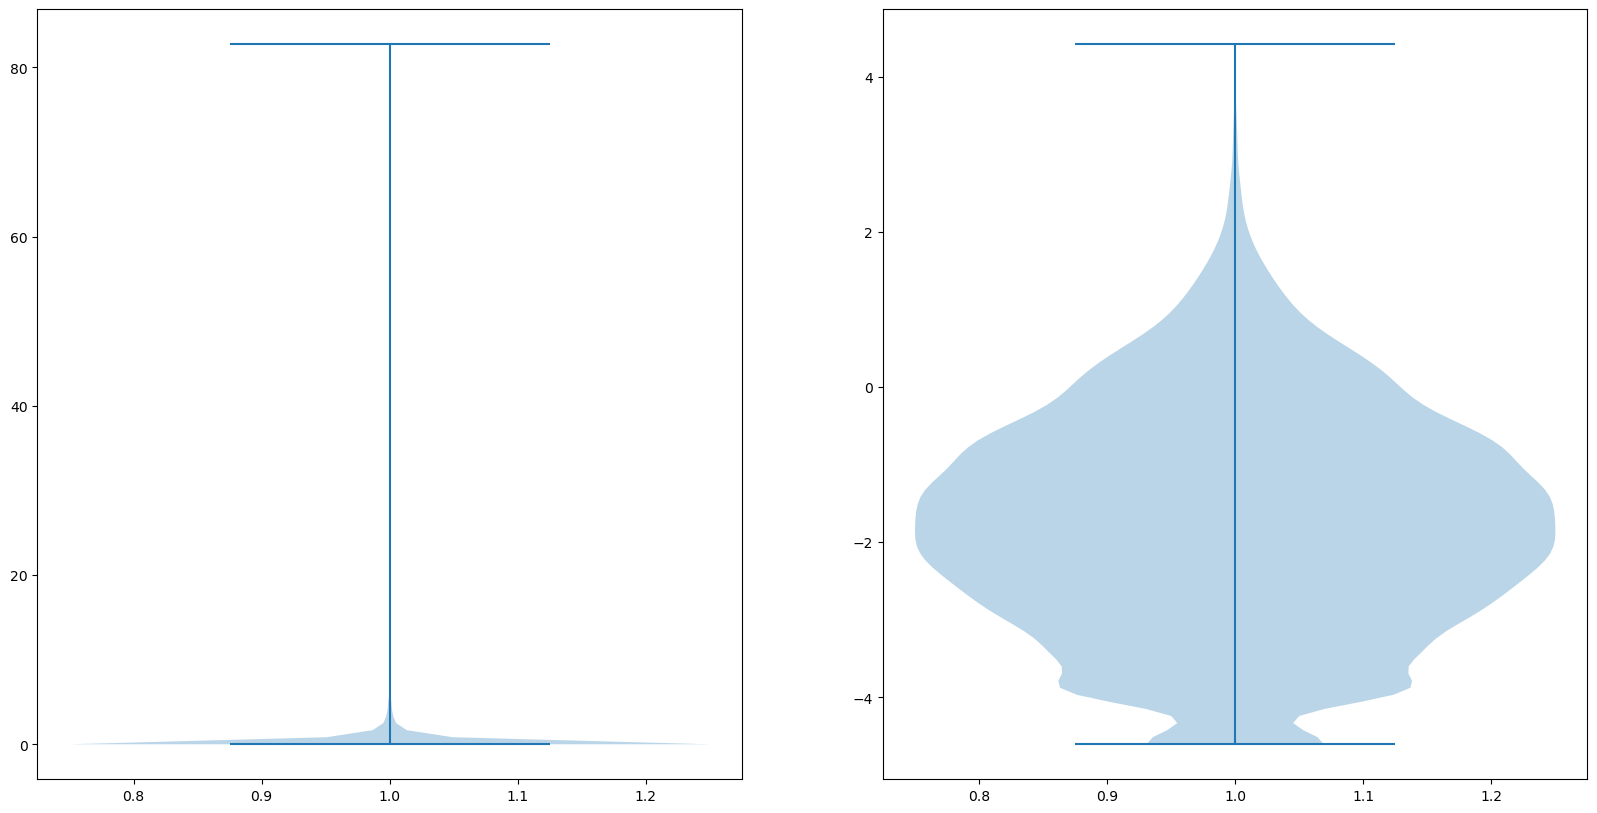

In [22]:
#visualization
fig, ax = plt.subplots(1,2, figsize = (20,10))

ax[0].violinplot(vgsales['Global_Sales'])

#log transformation
vgsales['Global_Sales_log'] = vgsales['Global_Sales'].apply(lambda x: math.log(x))
ax[1].violinplot(vgsales['Global_Sales_log'])

From the chart above (on the left), we can see that the sales frequency distribution is skewed, with a peak on the left and a long tail on the right. It deviates from the normal distribution and tends to be positive. Hence, we would use log transformation to adjust the data (on the right).

In [23]:
#log transformation
vgsales['Global_Sales'].replace(0, 0.001, inplace=True)
vgsales['Global_Sales_log'] = vgsales['Global_Sales'].apply(lambda x: math.log(x))

vgsales['NA_Sales'].replace(0, 0.001, inplace=True)
vgsales['NA_Sales_log'] = vgsales['NA_Sales'].apply(lambda x: math.log(x))

vgsales['EU_Sales'].replace(0, 0.001, inplace=True)
vgsales['EU_Sales_log'] = vgsales['EU_Sales'].apply(lambda x: math.log(x))

vgsales['JP_Sales'].replace(0, 0.001, inplace=True)
vgsales['JP_Sales_log'] = vgsales['JP_Sales'].apply(lambda x: math.log(x))

vgsales['Other_Sales'].replace(0, 0.001, inplace=True)
vgsales['Other_Sales_log'] = vgsales['Other_Sales'].apply(lambda x: math.log(x))

#visualization
fig = go.Figure()

for col in vgsales[['Global_Sales_log', 'NA_Sales_log','EU_Sales_log', 'JP_Sales_log', 'Other_Sales_log']]:
    fig.add_trace(go.Box(y=vgsales[col].values, name= col))

fig.show()

# Platform performance:

In [ ]:
#platforms and genres
platforms = vgsales['Platform'].values
genres = vgsales['Genre'].values

#visualization
fig = go.Figure()

for genre in genres:
    fig.add_trace(go.Histogram(
        x=vgsales[vgsales['Genre'] == genre].Platform,
        opacity=0.75,
        name = genre))
            
#display
fig.show()

# TOP 10 BIGGEST PUBLISHER

trace = go.Histogram(x=df.Publisher,marker=dict(color="crimson",line=dict(color='black', width=2)),opacity=0.75)
layout = go.Layout(
    title='Numbers of Top 100 Video Games Publishers',
    xaxis=dict(
        title='Publishers'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

# VI) Golden Age of Video Games 

Games in the last 2 decades:

In [24]:
#2010-2020 dataset
recent_game = vgsales[vgsales['Year']>2000].sort_values(['Global_Sales','NA_Sales'], ascending=False)

#data preprocessing
recent_game['Year'] = recent_game['Year'].astype('int')            #convert year column of recent_game to int
recent_game['Rank'] = np.arange(1,len(recent_game['Rank'])+1,1)    #re-arange games Ranking
#recent_game.reset_index()

#set_blackground
cm = sns.light_palette("lightblue", as_cmap=True)

#Applying currency formatting+find max/min
recent_game.head(20)\
    .style.background_gradient(cmap=cm)\
    .set_properties(**{'color': 'blue',
                        'border-color': 'white'})\
    .format({'Global_Sales':'${:.2f}', 'NA_Sales':'$ {:.2f}', 'EU_Sales':'$ {:.2f}'\
    ,'JP_Sales':'$ {:.2f}' , 'Other_Sales':'$ {:.2f}'}, precision=1)\
    .highlight_max(subset=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], color='lightgreen')\
    .highlight_min(subset=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], color='red')\
    .text_gradient(cmap='PiYG',subset='Rank')